In [1]:
import sys
sys.path.append("..\\")
from batchAQUA import batchAQUA
from AQUA_class import AQUA
from stimulus import *
from plotting_functions import *

import numpy as np
import matplotlib.pyplot as plt

In [2]:
params = {'a': 0.02, 'b': 0.2, 'c': -65, 'd': 8, 'e': 0.0, 'f': 0.0, 'tau': 0.0, 'E_syn': 0.0}
N_models = 10
params_list = []

x_ini = np.array([-65, 0., 0.])
x_start = np.zeros((N_models, 3))
t_start = 0.0

for i in range(N_models):
    params_list.append(params)
    x_start[i] = x_ini

print(np.shape(params_list))


(10,)


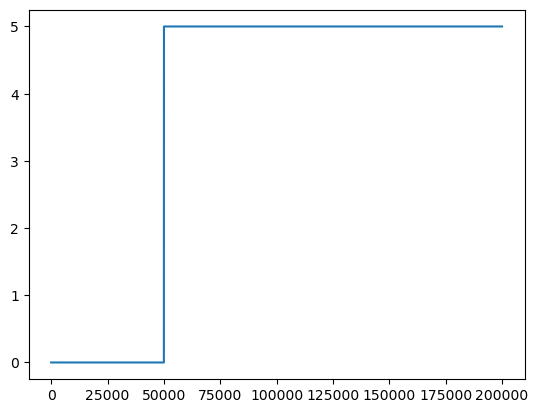

In [3]:
T = 2000
dt = 0.01
N_iter = int(T/dt)

I_inj = np.array([step_current(N_iter, dt, 0.0, 500, i) for i in range(N_models)])
#I_inj = np.zeros((N_models, N_iter))
plt.plot(I_inj[5])


In [4]:
batch = batchAQUA(params_list)
#batch.tau = np.random.rand(N_models)
batch.Initialise(x_start, t_start)

# X has shape (N_models, 3, N_iter)
X, T, spikes = batch.update_batch(dt, N_iter, I_inj)


In [5]:
print(batch.N_models)

10


C:\Users\liamm\AppData\Local\Temp\ipykernel_2020\3959756717.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


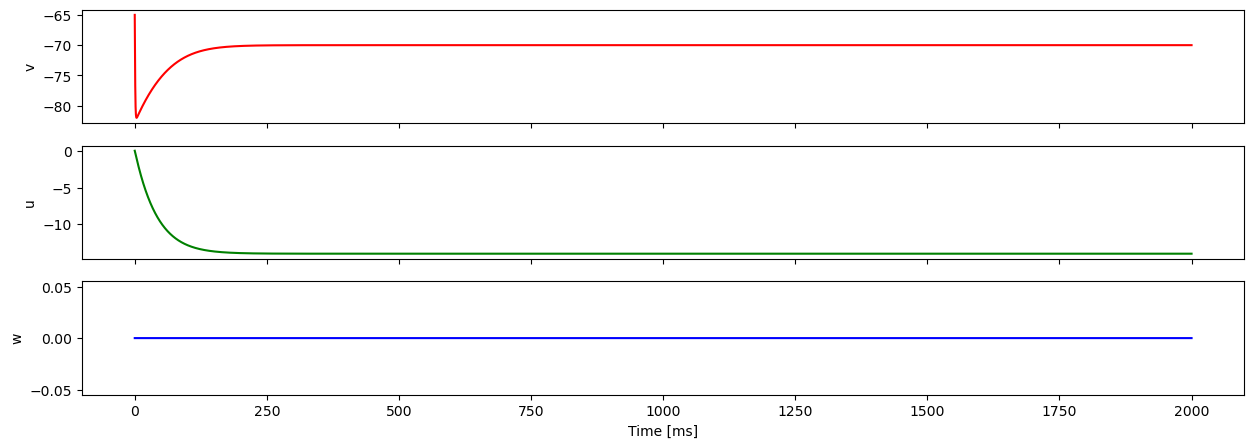

In [6]:
fig, ax = plot_membrane_variables(X[0, :, :], T)
fig.show()

C:\Users\liamm\AppData\Local\Temp\ipykernel_2020\107284109.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


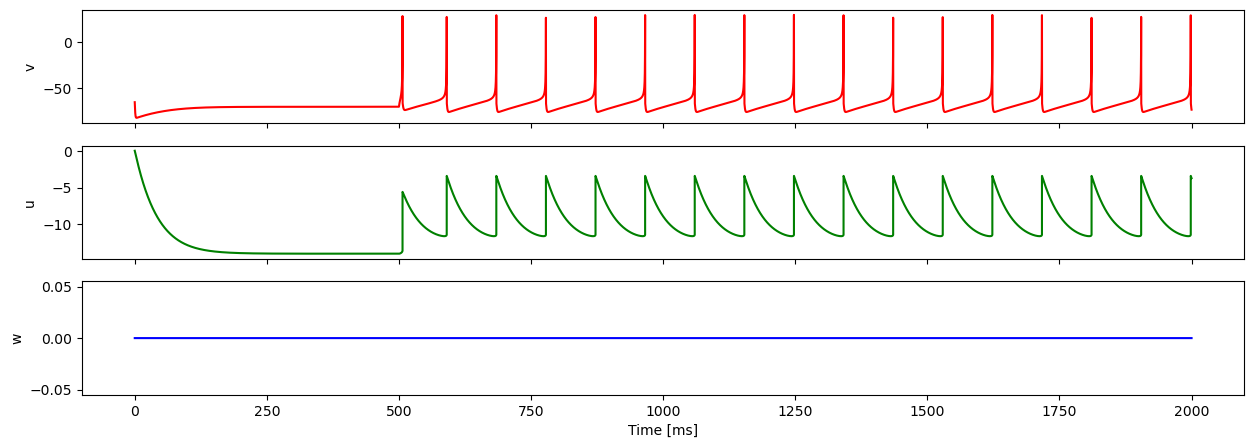

In [7]:
fig, ax = plot_membrane_variables(X[5], T)
fig.show()

C:\Users\liamm\AppData\Local\Temp\ipykernel_2020\2034523541.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


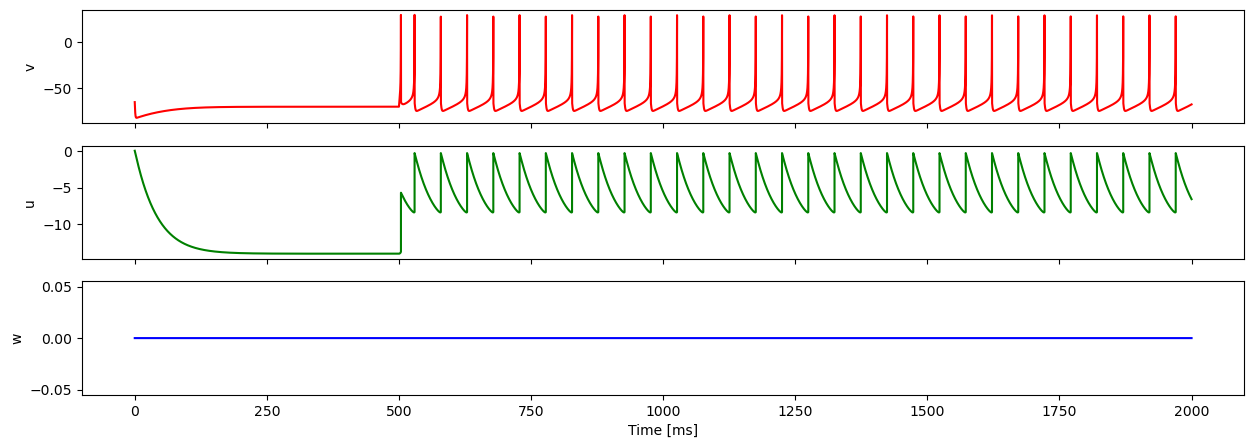

In [8]:
fig, ax = plot_membrane_variables(X[9], T)
fig.show()

C:\Users\liamm\AppData\Local\Temp\ipykernel_2020\107284109.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


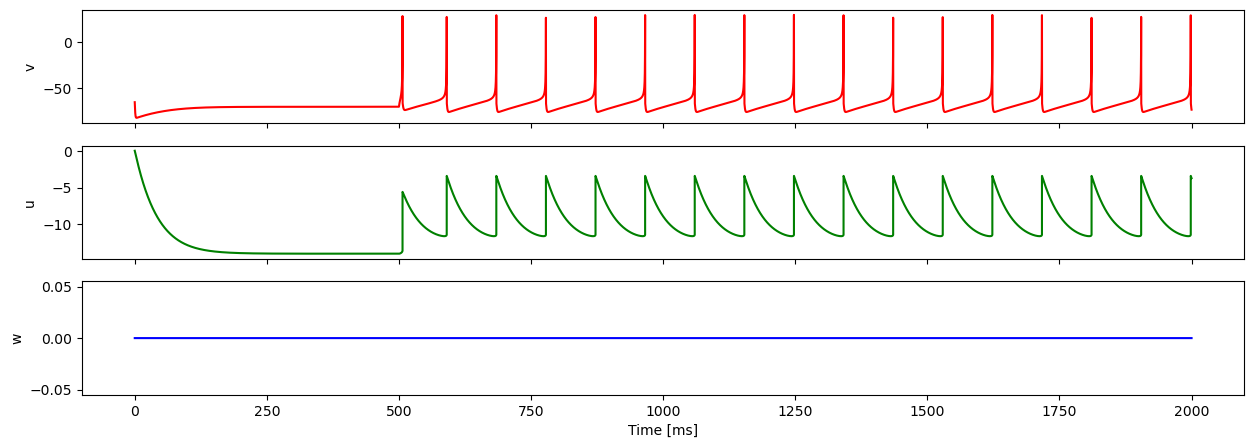

In [10]:
fig, ax = plot_membrane_variables(X[5], T)
fig.show()

In [13]:
neuron = AQUA(params['a'], params['b'], params['c'], params['d'])
neuron.Initialise(x_ini, t_start)

I = I_inj[9]

X_neuron, T_neuron, spikes_neuron = neuron.update_RK2(dt, N_iter, I)

print(spikes_neuron)
print(spikes[9][~np.isnan(spikes[9])])


[ 503.78  529.58  579.26  628.93  678.6   728.27  777.94  827.61  877.28
  926.95  976.62 1026.29 1075.96 1125.63 1175.3  1224.97 1274.64 1324.31
 1373.98 1423.65 1473.32 1522.99 1572.66 1622.33 1672.   1721.67 1771.34
 1821.01 1870.68 1920.35 1970.02]
[ 503.78  529.58  579.26  628.93  678.6   728.27  777.94  827.61  877.28
  926.95  976.62 1026.29 1075.96 1125.63 1175.3  1224.97 1274.64 1324.31
 1373.98 1423.65 1473.32 1522.99 1572.66 1622.33 1672.   1721.67 1771.34
 1821.01 1870.68 1920.35 1970.02]
